# <h1 id="arquitectura">Arquitectura Propuesta</h1>

Una vez consolidado los sets de información de entrenamiento, validacion y pruebas ya podemos iniciar a modelar nuestra red neuronal con las siguientes consideraciones:
* Debido a que el problema consiste en un clasificador binario la función de perdidas más recomendada es "binary_crossentropy".
* De manera similar una función de activación que se adecua al tipo de problema es la "sigmoid".
* La metrica para evaluación sera la precisión "accuracy"
* Debido a la gran cantidad de información el entrenamiento tomara más tiempo, en este escenario se implementaran arquitecturas más pequeñas con pocas epocas de entrenamiento y se escalará el modelo a medida los resultados del accuracy mejoren.

In [1]:
from IPython.display import display

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.layers import Dense
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
data = pd.read_parquet('../data/redhat_v1.parquet')
print(f'Data: {data.shape}')

y = data['outcome']
data.drop(columns=['outcome'], inplace=True)

print(f'y:    {y.shape}')
print(f'x:    {data.shape}')

Data: (2197291, 183)
y:    (2197291,)
x:    (2197291, 182)


In [3]:
data = StandardScaler().fit_transform(data)

x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

print(f'TRAIN')
print(f'   x: {x_train.shape}')
print(f'   y: {y_train.shape}')

print(f'VAL')
print(f'   x: {x_val.shape}')
print(f'   y: {y_val.shape}')

print(f'TEST')
print(f'   x: {x_test.shape}')
print(f'   y: {y_test.shape}')

TRAIN
   x: (1406265, 182)
   y: (1406265,)
VAL
   x: (351567, 182)
   y: (351567,)
TEST
   x: (439459, 182)
   y: (439459,)


In [4]:
layers = [
    Dense(256, input_dim=x_train.shape[1], activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid'),
]

model = Sequential(layers=layers)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=7, batch_size=256)

Train on 1406265 samples, validate on 351567 samples
Epoch 1/7
1406265/1406265 [==============================] - 51s 37us/step - loss: 0.2164 - accuracy: 0.9042 - val_loss: 0.1645 - val_accuracy: 0.9316
Epoch 2/7
1406265/1406265 [==============================] - 44s 31us/step - loss: 0.1435 - accuracy: 0.9413 - val_loss: 0.1290 - val_accuracy: 0.9480
Epoch 3/7
1406265/1406265 [==============================] - 43s 31us/step - loss: 0.1159 - accuracy: 0.9541 - val_loss: 0.1164 - val_accuracy: 0.9548
Epoch 4/7
1406265/1406265 [==============================] - 42s 30us/step - loss: 0.1005 - accuracy: 0.9609 - val_loss: 0.1026 - val_accuracy: 0.9606
Epoch 5/7
1406265/1406265 [==============================] - 42s 30us/step - loss: 0.0903 - accuracy: 0.9651 - val_loss: 0.0938 - val_accuracy: 0.9646
Epoch 6/7
1406265/1406265 [==============================] - 41s 29us/step - loss: 0.0825 - accuracy: 0.9683 - val_loss: 0.0894 - val_accuracy: 0.9666
Epoch 7/7
1406265/1406265 [==============

In [11]:
result = model.evaluate(x_test, y_test)

for i in range(len(model.metrics_names)):
    print('{} : {:.3}'.format(model.metrics_names[i], result[i]))

439459/439459 [==============================] - 21s 48us/step
loss : 0.0843
accuracy : 0.969


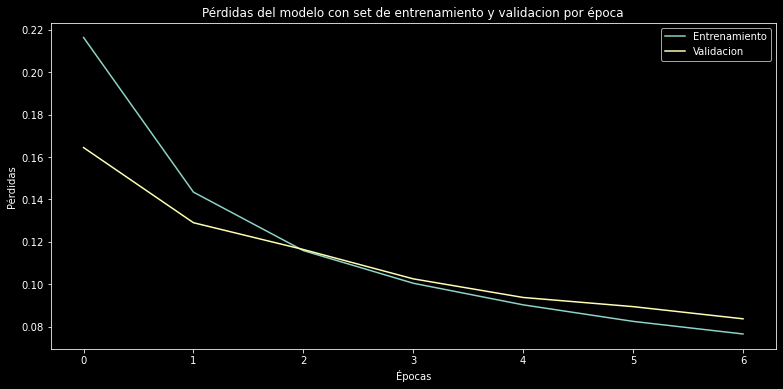

In [7]:
plt.figure(figsize=(13,6))

plt.plot(model.history.history['loss'], label='Entrenamiento')
plt.plot(model.history.history['val_loss'], label='Validacion')

plt.title("Pérdidas del modelo con set de entrenamiento y validacion por época")
plt.ylabel('Pérdidas')
plt.xlabel('Épocas')
plt.legend()

plt.show()

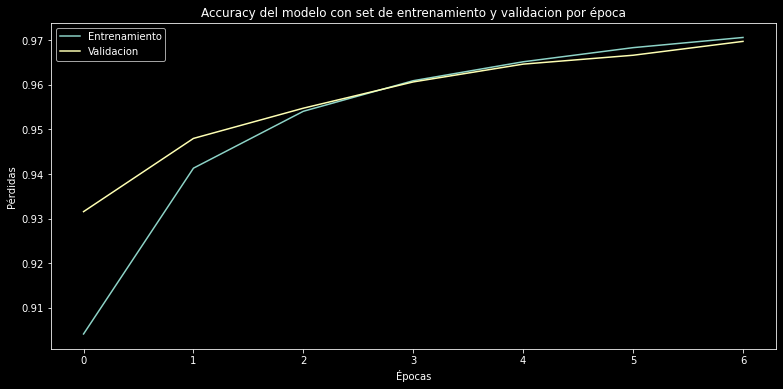

In [13]:
plt.figure(figsize=(13,6))

plt.plot(model.history.history['accuracy'], label='Entrenamiento')
plt.plot(model.history.history['val_accuracy'], label='Validacion')

plt.title("Accuracy del modelo con set de entrenamiento y validacion por época")
plt.ylabel('Pérdidas')
plt.xlabel('Épocas')
plt.legend()

plt.show()